Autor koda: Šimun Šopar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data

# Prvi zadatak

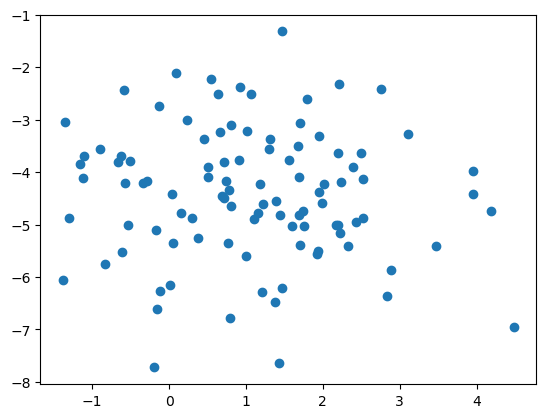

In [2]:
np.random.seed(100)
G = data.Random2DGaussian()
sample = G.get_sample(100)
plt.scatter(sample[:,0], sample[:,1])
plt.show()

In [3]:
f = open("zd1-data.txt", "w")
for d in sample:
    f.write(str(d) + '\n')
    
f.close()

# Drugi zadatak

In [3]:
def binlogreg_train(X, Y_):
    #u X jedan redak odgovara jednom podatku, dim(X) = NxD
    N = X.shape[0]
    
    w = np.random.randn(X.shape[1])
    b = 0
    
    param_iter = 500
    param_delta = 0.05
    
    for iteration in range(0, param_iter):
        
        scores = np.dot(X, w) + b
        
        probs = np.array([1/(1 + np.exp(-score)) for score in scores]) #vjer da je u klasi 1
        
        loss = 0
        dL_dscores = []
        for data_index in range(0, N):
            if(Y_[data_index] == 1):
                loss += np.log(probs[data_index])
                dL_dscores.append(probs[data_index] - 1)
            else:
                loss += np.log(1 - probs[data_index])
                dL_dscores.append(probs[data_index])
        loss *= -1/N
        dL_dscores = np.array(dL_dscores)
        
        if (iteration % 10) == 0:
            print("iteration {}: loss {}".format(iteration, loss))
            
        grad_w = 1/N*np.dot(dL_dscores, X)
        grad_b = 1/N*np.dot(dL_dscores, np.ones(N))
        
        w += -param_delta*grad_w
        b += -param_delta*grad_b
        
    return [w, b]
    
    
def binlogreg_classify(X, w, b):
    probs = np.array([1/( 1 + np.exp(-np.dot(w,x) - b) ) for x in X])
    return probs

In [8]:
np.random.seed(100)

X,Y_ = data.sample_gauss_2d(2, 100)

w,b = binlogreg_train(X, Y_)


iteration 0: loss 0.11144328511727698
iteration 10: loss 0.017171663624626816
iteration 20: loss 0.009098432136074084
iteration 30: loss 0.006164915442509301
iteration 40: loss 0.004655707666047248
iteration 50: loss 0.003737908841984174
iteration 60: loss 0.0031214273059643693
iteration 70: loss 0.0026790362794547606
iteration 80: loss 0.0023462254510309066
iteration 90: loss 0.0020868225752416654
iteration 100: loss 0.0018789832609243872
iteration 110: loss 0.001708740662234686
iteration 120: loss 0.0015667503309963928
iteration 130: loss 0.0014465252144645244
iteration 140: loss 0.0013434216455835198
iteration 150: loss 0.0012540283441855368
iteration 160: loss 0.0011757832317842811
iteration 170: loss 0.0011067247918719238
iteration 180: loss 0.0010453259242625913
iteration 190: loss 0.0009903800446827028
iteration 200: loss 0.0009409212228202595
iteration 210: loss 0.0008961670576665068
iteration 220: loss 0.000855477081947854
iteration 230: loss 0.0008183219853100088
iteration 24

In [9]:
probs = binlogreg_classify(X, w,b)
Y = [1 if probs[i] > 0.5 else 0 for i in range(0, len(probs))]

accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)

1.0 1.0 1.0 1.0


# Treći zadatak

In [2]:
np.random.seed(100)

def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores
X, Y_ = data.sample_gauss_2d(2, 50)
Y = myDummyDecision(X)
Y = [1 if y > 0 else 0 for y in Y]

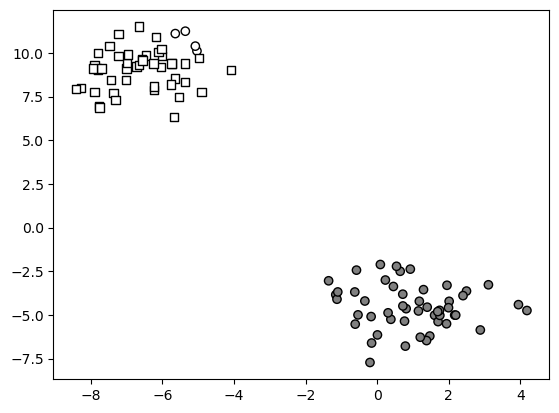

In [3]:
data.graph_data(X, Y_, Y)

# Četvrti zadatak

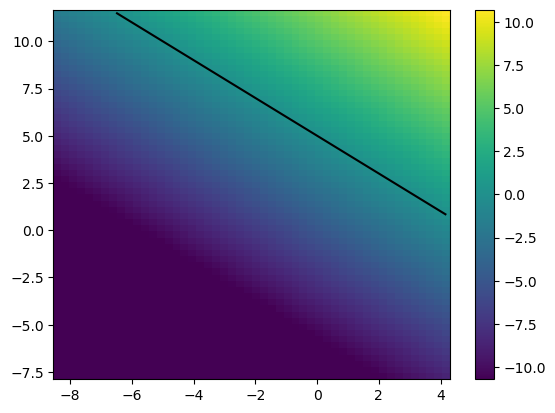

In [6]:
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(myDummyDecision, bbox, offset=0, width=50, height=60)

# Peti zadatak

In [10]:
np.random.seed(100)

X, Y_ = data.sample_gauss_2d(2, 50)

w, b = binlogreg_train(X, Y_)

iteration 0: loss 11.552166832179172
iteration 10: loss 0.1225342602066321
iteration 20: loss 0.06284398492368135
iteration 30: loss 0.04352844802089099
iteration 40: loss 0.03369896782691861
iteration 50: loss 0.027675252968106405
iteration 60: loss 0.02357857489615204
iteration 70: loss 0.020598985157501283
iteration 80: loss 0.01832753553872569
iteration 90: loss 0.016534561542177646
iteration 100: loss 0.01508075644137374
iteration 110: loss 0.013876528288219283
iteration 120: loss 0.012861541663167966
iteration 130: loss 0.011993621933380643
iteration 140: loss 0.011242367977154662
iteration 150: loss 0.010585291653991576
iteration 160: loss 0.010005387579558312
iteration 170: loss 0.009489549593217069
iteration 180: loss 0.00902750789113141
iteration 190: loss 0.008611097021019223
iteration 200: loss 0.00823374022624808
iteration 210: loss 0.007890078864164684
iteration 220: loss 0.007575701299129687
iteration 230: loss 0.007286941375833376
iteration 240: loss 0.00702072644149345

In [28]:
Y = binlogreg_classify(X, w, b)

acc, prec, odz = data.eval_perf_binary(np.array([1 if y > 0.5 else 0 for y in Y]), Y_)

print('Točnost =', acc, '; Preciznost =', prec, '; Odziv =', odz)

args = np.argsort(Y)
Y_r = Y_[args[::-1]]

print('AP =', data.eval_AP(Y_r))

Točnost = 1.0 ; Preciznost = 1.0 ; Odziv = 1.0
AP = 0.31182782068980486


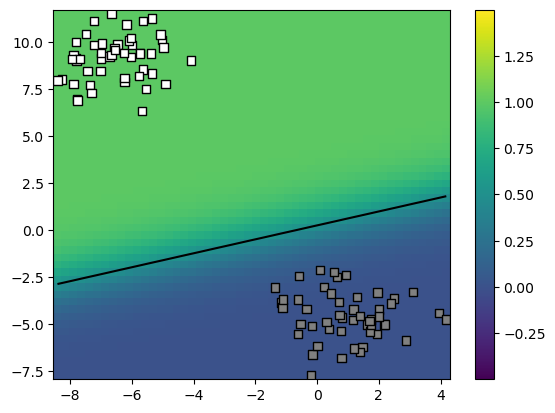

In [33]:
bbox=(np.min(X, axis=0), np.max(X, axis=0))


data.graph_surface(lambda x: binlogreg_classify(x, w, b), bbox, 0.5, 50, 50)
data.graph_data(X, Y_, Y)

plt.show()

# Šesti zadatak

In [7]:
def logregtrain(X, Y_):
    C = (int)(np.max(Y_) + 1)
    N = len(X)
    D = len(X[0])
    #initialize weights
    W = np.random.randn(C, D)
    b = np.zeros(C)
    
    
    param_iter = 300
    param_delta = 0.05
    
    for itera in range(0, param_iter):
    
        scores = np.dot(X, W.T) + b
        scores = [(s - np.max(s)).tolist() for s in scores]

        expscores = np.exp(scores)

        sumexp = np.dot(expscores, np.ones(C))

        #print(N, D, C, scores)
        
        probs = np.array([expscores[i] / sumexp[i] for i in range(0, N)])
        logprobs = scores - np.stack([np.log(sumexp) for i in range(0, C)]).T
        
        loss = 0
        for i in range(0, N):
            loss += logprobs[i][(int)(Y_[i])]
        loss /= -N

        if (itera % 10 == 0):
            print("iteration {}: loss {}".format(itera, loss))
        
        Y = np.array([[0]*(int)(y) + [1] + [0]*(C - 1 - (int)(y)) for y in Y_])
        
        G_s = probs - Y
        
        dL_ds = np.dot(G_s.T, X)
        
        grad_W = 1/N * dL_ds
        grad_b = 1/N * np.dot(G_s.T, np.zeros(N))
        
        W -= param_delta*grad_W
        b -= param_delta*grad_b

    return W, b

        
def logreg_classify(X, W, b):
    C = len(b)
    probs = []
    for x in X:
        S = np.dot(W, x) + b
        S -= np.max(S)
        denom = 0
        for s in S:
            denom += np.exp(s)
        probs.append([np.exp(S[i])/denom for i in range(0, C)])
    return np.array(probs)

In [8]:
X, Y_ = data.sample_gauss_2d(3, 4)
W, b = logregtrain(X, Y_)

iteration 0: loss 3.2530705804493754
iteration 10: loss 0.15962879847819095
iteration 20: loss 0.12824618615521902
iteration 30: loss 0.1159979605183903
iteration 40: loss 0.10631956240805825
iteration 50: loss 0.09816302877656237
iteration 60: loss 0.09118532742106727
iteration 70: loss 0.08514796140206249
iteration 80: loss 0.07987280219728309
iteration 90: loss 0.07522391473191987
iteration 100: loss 0.07109579882050122
iteration 110: loss 0.06740535132734281
iteration 120: loss 0.06408623921216679
iteration 130: loss 0.06108488241291541
iteration 140: loss 0.058357535410817674
iteration 150: loss 0.05586813321282285
iteration 160: loss 0.05358667853810265
iteration 170: loss 0.05148801830823332
iteration 180: loss 0.049550904271851694
iteration 190: loss 0.04775726378882253
iteration 200: loss 0.04609162797841795
iteration 210: loss 0.04454067904264054
iteration 220: loss 0.04309288879618508
iteration 230: loss 0.04173822768229718
iteration 240: loss 0.040467928757985466
iteration 

In [9]:
Y = logreg_classify(X, W, b)
Y = np.array([np.argmax(y) for y in Y])
Y

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], dtype=int64)

In [23]:
def decision_surface(X, W, b):
    def classify(X):
        
        return logreg_classify(X, W, b)
    
decision_surface(X, W, b)


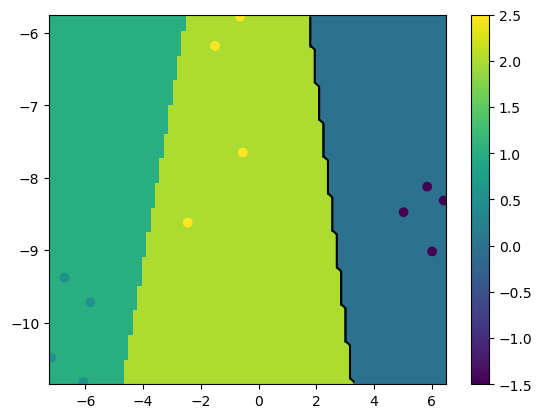

In [15]:
bbox=(np.min(X, axis=0), np.max(X, axis=0))

data.graph_surface(lambda X: np.argmax(logreg_classify(X, W, b), axis = 1), bbox, 0.5, 90, 90)
plt.scatter(X[:,0], X[:,1], c = Y_)

plt.show()